**Plotting mixtures and pure**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ref_df = pd.read_csv("reference_v2.csv")
mix_df = pd.read_csv("mixtures_dataset.csv")
# Exclude the last column ('Label') when converting to float
wavenumber_cols = ref_df.columns[0:-1]
wavenumbers = np.array(wavenumber_cols, dtype=float)
crop_mask = wavenumbers < 1700
cropped_wavenumbers = wavenumbers[crop_mask]

In [3]:
def minmax_normalize(arr):
    arr = np.array(arr, dtype=float)
    mn, mx = arr.min(), arr.max()
    # avoid division by zero
    return (arr - mn) / (mx - mn) if mx > mn else arr * 0

# Updated plotting functions with wavenumber masking
def plot_avg_pure_spectrum(pure_label):
    pure_specs = ref_df[ref_df['Label'] == pure_label].drop(columns='Label').values
    avg_pure = pure_specs.mean(axis=0)
    avg_pure_cropped = avg_pure[crop_mask]
    avg_pure_norm = minmax_normalize(avg_pure_cropped)

    plt.figure(figsize=(10, 4))
    plt.plot(cropped_wavenumbers, avg_pure_norm, label=f'Avg Pure (Normalized): {pure_label}')
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Normalized Intensity")
    plt.title(f"Average Pure Raman Spectrum (Cropped): {pure_label}")
    plt.legend()
    plt.tight_layou
    
def plot_all_pure_spectra(pure_label):
    pure_specs = ref_df[ref_df['Label'] == pure_label].drop(columns='Label').values
    plt.figure(figsize=(10,4))
    for spec in pure_specs:
        spec_cropped = spec[crop_mask]
        spec_norm = minmax_normalize(spec_cropped)
        plt.plot(cropped_wavenumbers, spec_norm, alpha=0.3)
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Normalized Intensity")
    plt.title(f"All Pure Raman Spectra (Normalized): {pure_label}")
    plt.tight_layout()
    plt.show()


def plot_avg_mixture_spectrum(label1, label2):
    mix_specs = mix_df[
        ((mix_df['Label 1'] == label1) & (mix_df['Label 2'] == label2)) |
        ((mix_df['Label 1'] == label2) & (mix_df['Label 2'] == label1))
    ]
    mix_array = mix_specs.drop(columns=['Label 1', 'Label 2']).values
    avg_mix = mix_array.mean(axis=0)
    avg_mix_cropped = avg_mix[crop_mask]
    avg_mix_norm = minmax_normalize(avg_mix_cropped)

    plt.figure(figsize=(10, 4))
    plt.plot(cropped_wavenumbers, avg_mix_norm, label=f'Avg Mixture (Normalized): {label1} + {label2}')
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Normalized Intensity")
    plt.title(f"Average Mixture Raman Spectrum (Cropped): {label1} + {label2}")
    plt.legend()
    plt.tight_layout()
    plt.show()



def plot_all_pure_spectra(pure_label):
    pure_specs = ref_df[ref_df['Label'] == pure_label].drop(columns='Label').values
    plt.figure(figsize=(10,4))
    for spec in pure_specs:
        spec_cropped = spec[crop_mask]
        spec_norm = minmax_normalize(spec_cropped)
        plt.plot(cropped_wavenumbers, spec_norm, alpha=0.3)
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Normalized Intensity")
    plt.title(f"All Pure Raman Spectra (Normalized): {pure_label}")
    plt.tight_layout()
    plt.show()

In [ ]:
ref_df = pd.read_csv(".csv")
# Exclude the last column ('Label') when converting to float
wavenumber_cols = ref_df.columns[0:-1]
wavenumbers = np.array(wavenumber_cols, dtype=float)
crop_mask = wavenumbers < 1700
cropped_wavenumbers = wavenumbers[crop_mask]

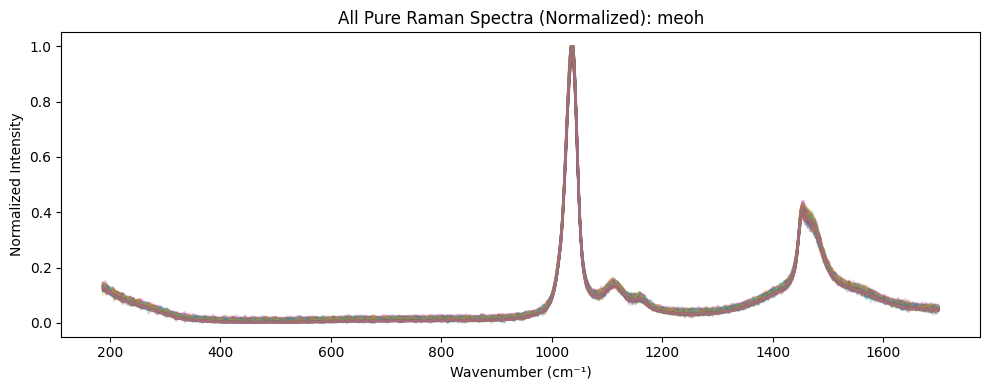

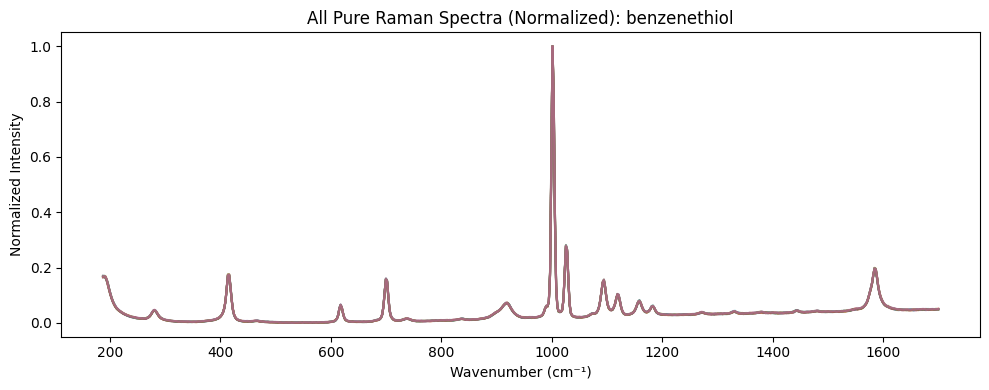

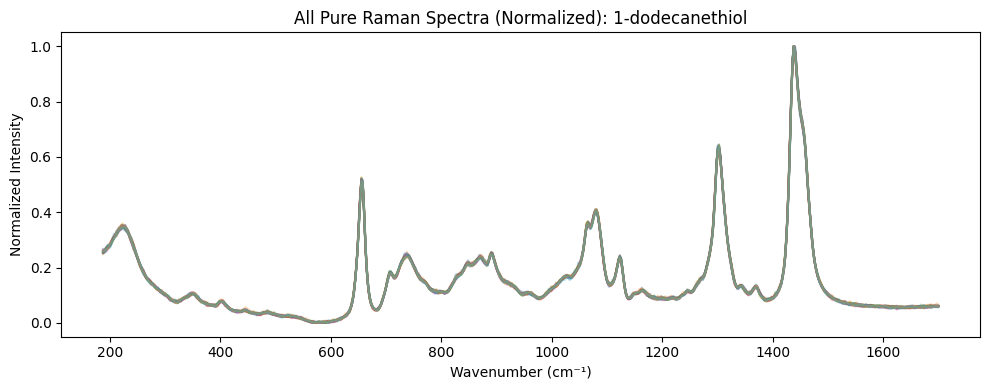

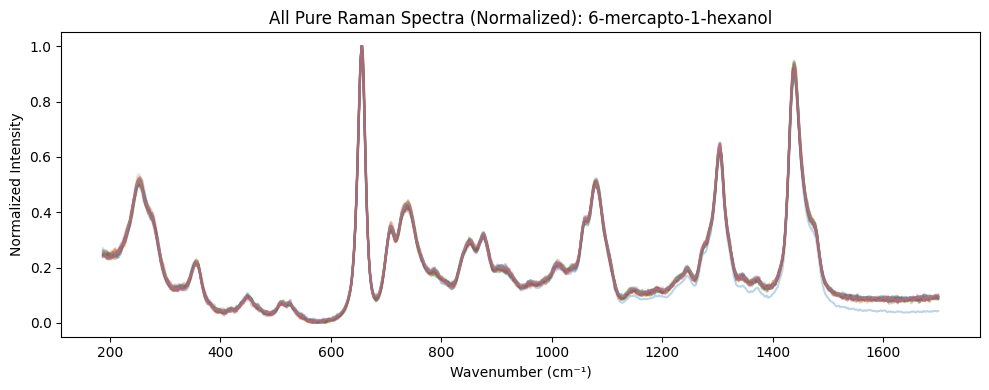

In [13]:
plot_all_pure_spectra("meoh")

plot_all_pure_spectra("benzenethiol")

plot_all_pure_spectra("1-dodecanethiol")
plot_all_pure_spectra("6-mercapto-1-hexanol")

In [53]:
# --- Your preprocessing funcs (unchanged) ---
def baseline_als(y, lam=1e4, p=0.01, niter=10):
    L = len(y)
    D = np.diff(np.eye(L), 2)
    D = lam * D @ D.T
    w = np.ones(L)
    for _ in range(niter):
        b = np.linalg.solve(np.diag(w) + D, w * y)
        w = p * (y > b) + (1 - p) * (y < b)
    return b

def preprocess(arr, lam=1e4, p=0.01, niter=10):
    out = np.zeros_like(arr)
    for i, s in enumerate(arr):
        b = baseline_als(s, lam=lam, p=p, niter=niter)
        c = s - b
        norm = np.linalg.norm(c)
        out[i] = (c / norm) if (norm > 0) else c
    return out



# --- 3) Plotting funcs, same signature as yours ---
def plot_avg_pure_spectrum(pure_label):
    # get only the processed rows for this label
    specs = processed_df[processed_df['Label'] == pure_label] \
                .drop(columns='Label') \
                .values
    avg_spec = specs.mean(axis=0)
    avg_cropped = avg_spec[crop_mask]

    plt.figure(figsize=(10, 4))
    plt.plot(cropped_wavenumbers, avg_cropped,
             linewidth=2, label=f"Avg Pure: {pure_label}")
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Intensity (L₂‐normalized)")
    plt.title(f"Average Pure Raman Spectrum (Baseline‐corrected & L₂‐normalized): {pure_label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_all_pure_spectra(pure_label):
    specs = processed_df[processed_df['Label'] == pure_label] \
                .drop(columns='Label') \
                .values

    plt.figure(figsize=(10, 4))
    for s in specs:
        plt.plot(cropped_wavenumbers, s[crop_mask], alpha=0.3)
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Intensity (L₂‐normalized)")
    plt.title(f"All Pure Raman Spectra (Baseline‐corrected & L₂‐normalized): {pure_label}")
    plt.tight_layout()
    plt.show()


In [90]:
# --- 1) Load & preprocess entire dataset ---
ref_df = pd.read_csv("cleaned_PICO.csv")
# assume last column is 'Label'
wavenumber_cols = ref_df.columns[:-1]
wavenumbers = np.array(wavenumber_cols, dtype=float)

raw_specs = ref_df[wavenumber_cols].values
proc_specs = preprocess(raw_specs)      # baseline + L2‐norm
# re‐assemble into a DataFrame for easy filtering:
processed_df = pd.DataFrame(proc_specs, columns=wavenumber_cols)
processed_df['Label'] = ref_df['Label'].values

# --- 2) Define your crop ---
crop_mask = wavenumbers < 1700
cropped_wavenumbers = wavenumbers[crop_mask]

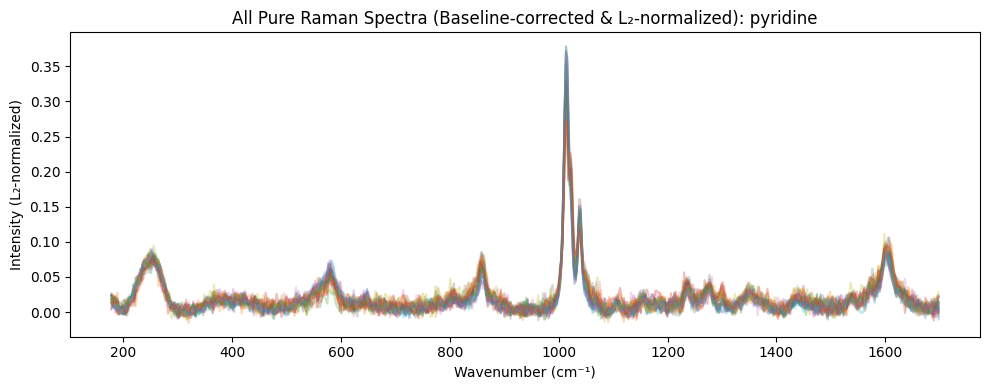

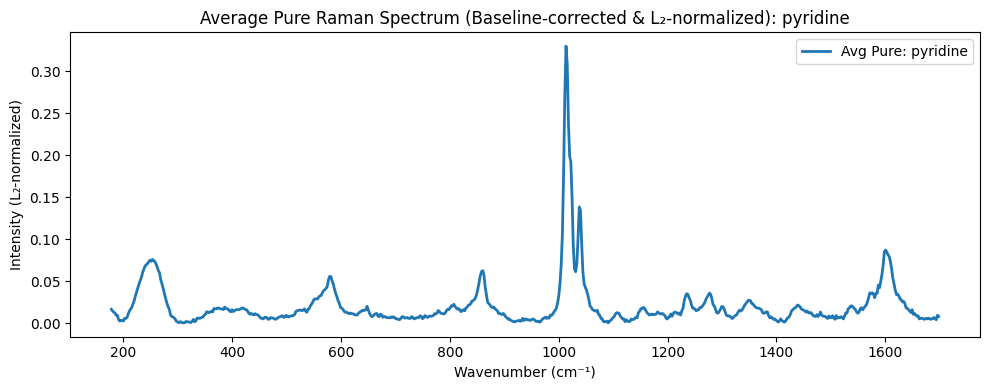

In [93]:
plot_all_pure_spectra("pyridine") 
plot_avg_pure_spectrum("pyridine")


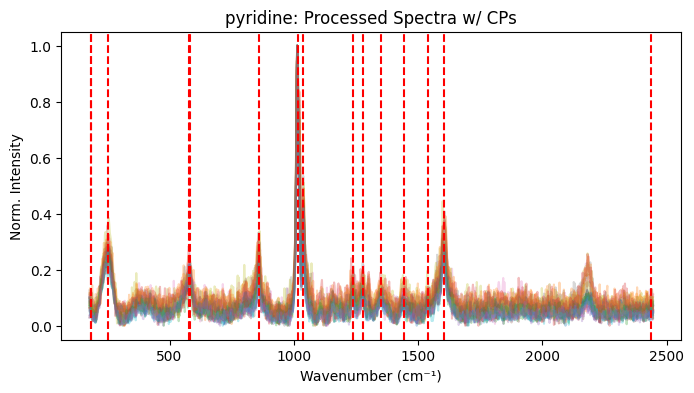

In [118]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
# 1) Load raw data
raw_ref   = pd.read_csv('cleaned_PICO.csv')
wavs_all  = raw_ref.columns[:-1].astype(float)


# 2) Subset your wavenumbers and raw arrays
wavs       = wavs_all
wavs_str   = raw_ref.columns[:-1]
refs_raw   = raw_ref[wavs_str].values.astype(float)

# 3) Preprocess (baseline + ℓ₂ norm) on cropped data
def baseline_als(y, lam=1e4, p=0.01, niter=10):
    L = len(y)
    D = np.diff(np.eye(L), 2); D = lam * D.dot(D.T)
    w = np.ones(L)
    for _ in range(niter):
        W = np.diag(w); Z = W + D
        b = np.linalg.solve(Z, w * y)
        w = p * (y > b) + (1-p) * (y < b)
    return b

def minmax_normalize(arr):
    mn, mx = arr.min(), arr.max()
    return (arr - mn) / (mx - mn) if mx > mn else np.zeros_like(arr)

# --- Preprocess with baseline + minmax norm ---
def preprocess(spectra):
    """
    spectra: 2D array shape (n_samples, n_wavenumbers)
    returns: same shape, baseline-corrected then minmax-normalized
    """
    out = np.zeros_like(spectra, dtype=float)
    for i, spec in enumerate(spectra):
        bkg  = baseline_als(spec)
        corr = spec - bkg
        out[i] = minmax_normalize(corr)
    return out

def smooth(spec, K_smooth=3):
    kernel = np.ones(K_smooth) / K_smooth
    return np.convolve(spec, kernel, mode='same')

refs_proc = preprocess(refs_raw)


# 4) Run CaPE and plotting on refs_proc using only wavs and wavs_str
K_smooth, N_peak = 5, 15
height = 0.2
prominence = 0.01
def smooth_spectrum(spec):
    return np.convolve(spec, np.ones(K_smooth)/K_smooth, mode='same')

def CaPE(refs):
    sm = np.array([smooth_spectrum(s) for s in refs])
    counts = np.zeros(sm.shape[1], int)
    for s in sm:
        pks, _ = find_peaks(smooth(s, K_smooth),
                                height=None, prominence=None)
        counts[pks] += 1
    return sorted(np.argsort(counts)[-N_peak:])

import matplotlib.pyplot as plt

for chem in sorted(raw_ref['Label'].unique()):
    idxs  = raw_ref.index[raw_ref['Label']==chem]
    refs_p = refs_proc[idxs]
    
    cp_idxs = CaPE(refs_p)
    cp_wavenums = wavs[cp_idxs]

    
    # Overlay spectra
    plt.figure(figsize=(8,4))
    for spec in refs_p:
        plt.plot(wavs, spec, alpha=0.3)
    for w in cp_wavenums:
        plt.axvline(w, linestyle='--', color='red')
    plt.title(f"{chem}: Processed Spectra w/ CPs")
    plt.xlabel('Wavenumber (cm⁻¹)')
    plt.ylabel('Norm. Intensity')
    plt.show()